# KLASIFIKASI KEMATANGAN APEL FUJI MENGGUNAKAN ALGORITMA K-NEAREST NEIGHBOR (KNN)

Notebook ini berisi langkah-langkah untuk mengklasifikasikan tingkat kematangan apel Fuji (mentah, setengah matang, matang) menggunakan algoritma K-Nearest Neighbor (KNN) berdasarkan fitur warna RGB dan HSV. Setiap langkah dirancang untuk menghasilkan data yang dapat digunakan untuk mengisi tabel-tabel dalam laporan skripsi, khususnya di Bab 4.

## Langkah 1: Import Library
Dalam langkah ini, kita mengimpor semua library yang diperlukan untuk pengolahan data, visualisasi, dan klasifikasi. Library yang digunakan meliputi:
- `numpy` untuk operasi numerik.
- `pandas` untuk manipulasi dan analisis data.
- `cv2` (OpenCV) untuk pengolahan gambar.
- `os` untuk mengakses file di sistem.
- `google.colab.drive` untuk menghubungkan Google Colab ke Google Drive.
- `matplotlib` dan `seaborn` untuk visualisasi data.
- `sklearn` untuk algoritma machine learning, termasuk KNN dan metrik evaluasi.

In [1]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import cv2
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Langkah 2: Menghubungkan Google Colab ke Google Drive
Dataset gambar apel Fuji disimpan di Google Drive dalam folder `/content/drive/MyDrive/apelfuji/` dengan subfolder `mentah`, `setengah_matang`, dan `matang`. Langkah ini menghubungkan Google Colab ke Google Drive untuk mengakses dataset tersebut.

In [2]:
# Menghubungkan Google Colab ke Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Langkah 3: Menghitung Jumlah Gambar per Kategori (Tabel 4.1)
Langkah ini menghitung jumlah gambar untuk setiap kategori kematangan apel (mentah, setengah matang, matang). Hasilnya akan digunakan untuk mengisi Tabel 4.1 dalam laporan skripsi, yang menunjukkan jumlah gambar per kategori.

In [3]:
# Menentukan kategori kematangan apel
categories = ['mentah', 'setengah_matang', 'matang']
jumlah_gambar = []

# Mengiterasi setiap kategori untuk menghitung jumlah gambar
for category in categories:
    # Membuat path ke folder kategori
    folder_path = f'/content/drive/MyDrive/apelfuji/{category}'
    # Menghitung jumlah file dalam folder (diasumsikan semua adalah gambar)
    num_images = len(os.listdir(folder_path))
    # Menambahkan jumlah ke daftar
    jumlah_gambar.append(num_images)

# Membuat DataFrame untuk Tabel 4.1
df_table4_1 = pd.DataFrame({
    'Kategori': ['Mentah', 'Setengah Matang', 'Matang'],
    'Jumlah Gambar': jumlah_gambar
})

# Menampilkan Tabel 4.1
print('Tabel 4.1: Data Apel Fuji')
print(df_table4_1)

Tabel 4.1: Data Apel Fuji
          Kategori  Jumlah Gambar
0           Mentah             80
1  Setengah Matang             80
2           Matang             80


## Langkah 4: Menampilkan Contoh Gambar dari Setiap Kategori (Tabel 4.2)
Langkah ini menampilkan satu contoh gambar dari setiap kategori kematangan untuk memberikan gambaran visual. Gambar-gambar ini akan direferensikan dalam Tabel 4.2 dalam laporan skripsi.

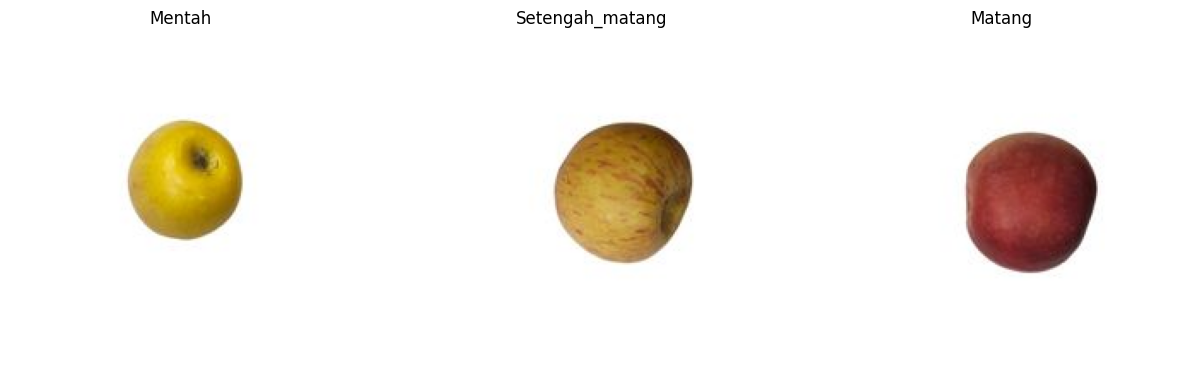

In [4]:
# Menyiapkan plot untuk menampilkan gambar
plt.figure(figsize=(15, 5))

# Mengiterasi setiap kategori untuk menampilkan satu gambar
for i, category in enumerate(categories):
    # Mengambil gambar pertama dari setiap kategori
    img_path = os.path.join(f'/content/drive/MyDrive/apelfuji/{category}', os.listdir(f'/content/drive/MyDrive/apelfuji/{category}')[0])
    # Membaca gambar menggunakan OpenCV
    img = cv2.imread(img_path)
    # Mengubah format warna dari BGR ke RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Menampilkan gambar dalam subplot
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(category.capitalize())
    plt.axis('off')

# Menampilkan plot
plt.show()

## Langkah 5: Mengekstrak Nilai Warna RGB dari Titik Tertentu (Tabel 4.3 dan 4.4)
Langkah ini mengekstrak nilai warna RGB dari titik-titik tertentu pada satu gambar contoh untuk mengilustrasikan proses ekstraksi fitur warna. Tabel 4.3 menunjukkan nilai RGB asli (rentang 0-255), sedangkan Tabel 4.4 menunjukkan nilai RGB yang telah dinormalisasi (rentang 0-1).

In [5]:
# Memuat gambar contoh
img_path = '/content/drive/MyDrive/apelfuji/matang/1.jpg'  # Ganti dengan path gambar contoh Anda
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menentukan koordinat untuk ekstraksi warna
x = 100
ys = range(83, 88)

# Mengekstrak nilai RGB dari koordinat yang ditentukan
data_rgb = []
for y in ys:
    r, g, b = img_rgb[x, y]
    data_rgb.append([x, y, r, g, b])

# Membuat DataFrame untuk Tabel 4.3
df_4_3 = pd.DataFrame(data_rgb, columns=['X', 'Y', 'R', 'G', 'B'])

# Menormalkan nilai RGB
data_normalized = []
for row in data_rgb:
    x, y, r, g, b = row
    normalized_r = r / 255.0
    normalized_g = g / 255.0
    normalized_b = b / 255.0
    data_normalized.append([x, y, normalized_r, normalized_g, normalized_b])

# Membuat DataFrame untuk Tabel 4.4
df_4_4 = pd.DataFrame(data_normalized, columns=['X', 'Y', 'Normalized R', 'Normalized G', 'Normalized B'])

# Menampilkan Tabel 4.3
print('Tabel 4.3: Sampel RGB Per-Koordinat Per-Gambar')
print(df_4_3)

# Menampilkan Tabel 4.4
print('Tabel 4.4: Sampel Normalisasi RGB per Koordinat per Gambar')
print(df_4_4)

Tabel 4.3: Sampel RGB Per-Koordinat Per-Gambar
     X   Y   R   G   B
0  100  83  87  27  27
1  100  84  84  26  25
2  100  85  80  24  23
3  100  86  75  24  23
4  100  87  73  23  22
Tabel 4.4: Sampel Normalisasi RGB per Koordinat per Gambar
     X   Y  Normalized R  Normalized G  Normalized B
0  100  83      0.341176      0.105882      0.105882
1  100  84      0.329412      0.101961      0.098039
2  100  85      0.313725      0.094118      0.090196
3  100  86      0.294118      0.094118      0.090196
4  100  87      0.286275      0.090196      0.086275


## Langkah 5.5: Mengekstrak Nilai Warna HSV dari Titik Tertentu (Tabel 4.6)
Selain RGB, kita juga mengekstrak nilai warna HSV dari titik-titik yang sama untuk menunjukkan bagaimana fitur warna dalam ruang warna HSV diekstraksi. Hasilnya akan digunakan untuk mengisi Tabel 4.6.

In [6]:
# Fungsi untuk mengonversi RGB ke HSV
def rgb_to_hsv(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx - mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g - b) / df) % 360)
    elif mx == g:
        h = (60 * ((b - r) / df + 2))
    else:
        h = (60 * ((r - g) / df + 4))
    if mx == 0:
        s = 0
    else:
        s = df / mx
    v = mx
    return h, s, v

# Mengekstrak nilai HSV dari koordinat yang sama
data_hsv = []
for row in data_rgb:
    x, y, r, g, b = row
    h, s, v = rgb_to_hsv(r, g, b)
    data_hsv.append([x, y, h, s, v])

# Membuat DataFrame untuk Tabel 4.6
df_4_6 = pd.DataFrame(data_hsv, columns=['X', 'Y', 'H', 'S', 'V'])

# Menampilkan Tabel 4.6
print('Tabel 4.6: Sampel HSV Per-Koordinat Per-Gambar')
print(df_4_6)

Tabel 4.6: Sampel HSV Per-Koordinat Per-Gambar
     X   Y         H         S         V
0  100  83  0.000000  0.689655  0.341176
1  100  84  1.016949  0.702381  0.329412
2  100  85  1.052632  0.712500  0.313725
3  100  86  1.153846  0.693333  0.294118
4  100  87  1.176471  0.698630  0.286275


## Langkah 6: Mengekstrak Rata-rata Warna RGB dan HSV dari Setiap Gambar (Tabel 4.5, 4.7, dan 4.8)
Langkah ini menghitung rata-rata nilai warna RGB dan HSV untuk setiap gambar dalam dataset. Hasilnya digunakan untuk membangun dataset lengkap (Tabel 4.8), serta menampilkan sampel rata-rata RGB (Tabel 4.5) dan HSV (Tabel 4.7). Dataset disimpan dalam format CSV untuk kemudahan penggunaan. Tabel 4.8 sesuai dengan Tabel 4.2.8 dalam laporan Anda.

In [7]:
# Inisialisasi list untuk menyimpan data rata-rata
data_all_images = []

# Label untuk setiap kategori (mentah: 1, setengah matang: 2, matang: 3)
labels = {'mentah': 1, 'setengah_matang': 2, 'matang': 3}

# Mengiterasi setiap kategori
for category in categories:
    folder_path = f'/content/drive/MyDrive/apelfuji/{category}'
    # Mengiterasi setiap gambar dalam kategori
    for img_name in os.listdir(folder_path):
        # Membaca gambar
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Menghitung rata-rata RGB
        mean_r = np.mean(img_rgb[:, :, 0])
        mean_g = np.mean(img_rgb[:, :, 1])
        mean_b = np.mean(img_rgb[:, :, 2])

        # Menormalkan rata-rata RGB
        mean_r_norm = mean_r / 255.0
        mean_g_norm = mean_g / 255.0
        mean_b_norm = mean_b / 255.0

        # Mengonversi rata-rata RGB ke HSV
        h, s, v = rgb_to_hsv(mean_r, mean_g, mean_b)

        # Menyimpan data ke list
        data_all_images.append([img_name, mean_r_norm, mean_g_norm, mean_b_norm, h, s, v, labels[category]])

# Membuat DataFrame untuk dataset lengkap (Tabel 4.8)
df_total = pd.DataFrame(data_all_images, columns=['Gambar', 'MeanR', 'MeanG', 'MeanB', 'MeanH', 'MeanS', 'MeanV', 'Kematangan'])

# Menampilkan beberapa baris pertama untuk Tabel 4.5 (sampel rata-rata RGB)
df_4_5 = df_total[['Gambar', 'MeanR', 'MeanG', 'MeanB']].head()
print('Tabel 4.5: Sampel Rata-rata RGB per Gambar')
print(df_4_5)

# Menampilkan beberapa baris pertama untuk Tabel 4.7 (sampel rata-rata HSV)
df_4_7 = df_total[['Gambar', 'MeanH', 'MeanS', 'MeanV']].head()
print('Tabel 4.7: Sampel Rata-rata HSV per Gambar')
print(df_4_7)

# Menampilkan beberapa baris pertama untuk Tabel 4.8 (dataset lengkap - Tabel 4.2.8)
print('Tabel 4.8: Dataset Lengkap untuk Klasifikasi (Tabel 4.2.8)')
print(df_total.head())

# Menyimpan dataset ke file CSV
df_total.to_csv('/content/drive/MyDrive/apelfuji/dataset_apel_fuji.csv', index=False)
print('Dataset telah disimpan ke /content/drive/MyDrive/apelfuji/dataset_apel_fuji.csv')

Tabel 4.5: Sampel Rata-rata RGB per Gambar
   Gambar     MeanR     MeanG     MeanB
0   7.jpg  0.976494  0.964549  0.917973
1  27.jpg  0.973324  0.957444  0.907688
2  55.jpg  0.970396  0.959598  0.932943
3  71.jpg  0.973739  0.965097  0.936175
4  39.jpg  0.973735  0.963142  0.923046
Tabel 4.7: Sampel Rata-rata HSV per Gambar
   Gambar      MeanH     MeanS     MeanV
0   7.jpg  47.753190  0.059930  0.976494
1  27.jpg  45.483031  0.067435  0.973324
2  55.jpg  42.702124  0.038595  0.970396
3  71.jpg  46.196235  0.038577  0.973739
4  39.jpg  47.460979  0.052056  0.973735
Tabel 4.8: Dataset Lengkap untuk Klasifikasi (Tabel 4.2.8)
   Gambar     MeanR     MeanG     MeanB      MeanH     MeanS     MeanV  \
0   7.jpg  0.976494  0.964549  0.917973  47.753190  0.059930  0.976494   
1  27.jpg  0.973324  0.957444  0.907688  45.483031  0.067435  0.973324   
2  55.jpg  0.970396  0.959598  0.932943  42.702124  0.038595  0.970396   
3  71.jpg  0.973739  0.965097  0.936175  46.196235  0.038577  0.973739   

## Langkah 7: Visualisasi Distribusi Fitur
Langkah ini membuat visualisasi distribusi fitur (MeanR, MeanG, MeanB, MeanH, MeanS, MeanV) menggunakan pairplot untuk melihat hubungan antar fitur dan distribusi berdasarkan kategori kematangan. Visualisasi ini membantu memahami data sebelum pelatihan model.

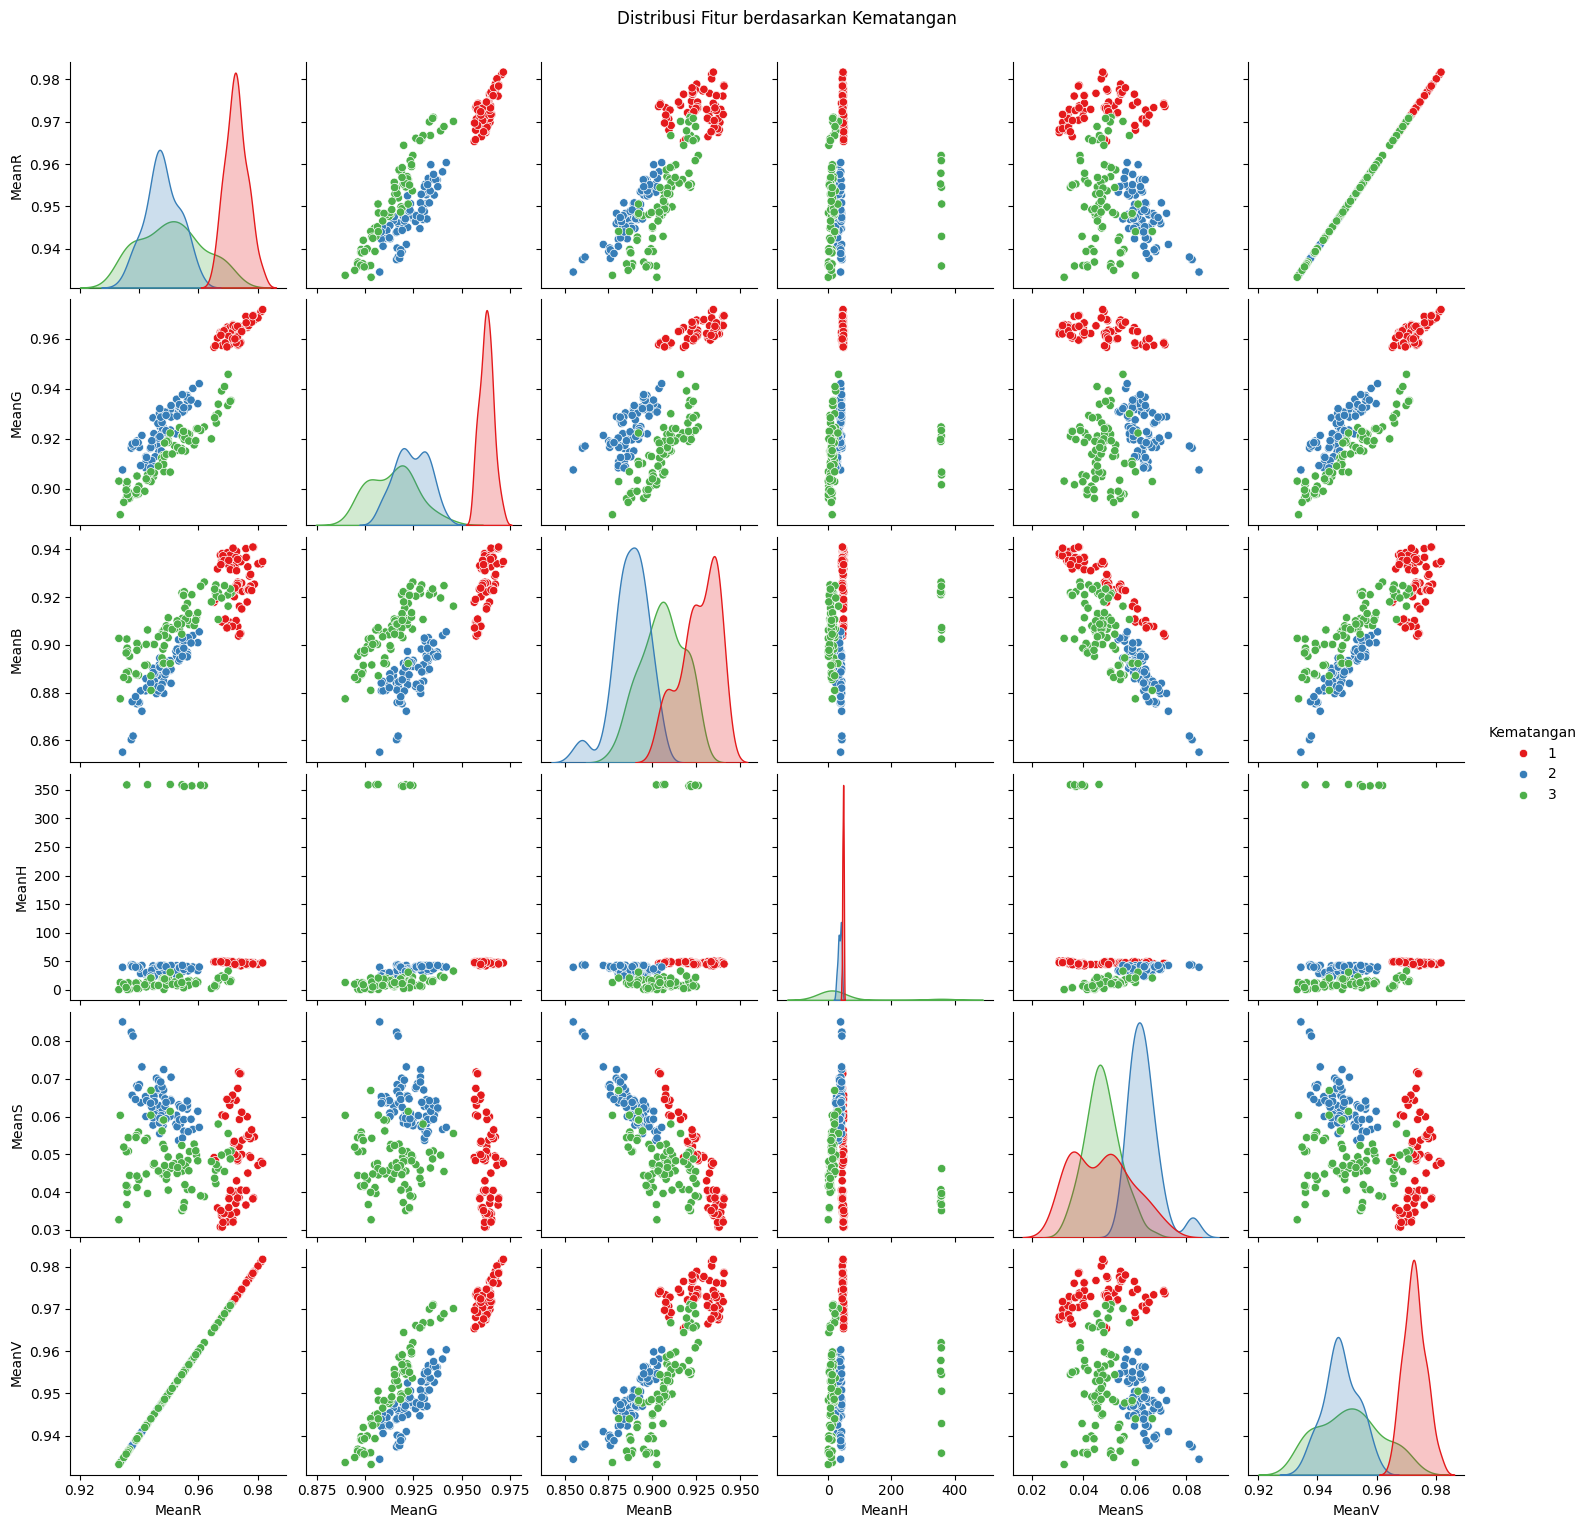

In [8]:
# Membuat pairplot untuk visualisasi distribusi fitur
sns.pairplot(df_total, hue='Kematangan', vars=['MeanR', 'MeanG', 'MeanB', 'MeanH', 'MeanS', 'MeanV'], palette='Set1')
plt.suptitle('Distribusi Fitur berdasarkan Kematangan', y=1.02)
plt.show()

## Langkah 8: Membagi Data untuk Pelatihan dan Pengujian
Langkah ini membagi dataset menjadi data latih (80%) dan data uji (20%) untuk melatih dan mengevaluasi model KNN. Fitur yang digunakan adalah MeanR, MeanG, MeanB, MeanH, MeanS, dan MeanV, sedangkan targetnya adalah Kematangan.

In [9]:
# Menentukan fitur (X) dan target (y)
X = df_total[['MeanR', 'MeanG', 'MeanB', 'MeanH', 'MeanS', 'MeanV']]
y = df_total['Kematangan']

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data latih dan uji
print('Jumlah data latih:', len(X_train))
print('Jumlah data uji:', len(X_test))

Jumlah data latih: 192
Jumlah data uji: 48


## Langkah 9: Melatih Model KNN dan Menghitung Confusion Matrix (Tabel 4.9 hingga 4.11)
Langkah ini melatih model KNN dengan k=3, kemudian menghitung akurasi dan confusion matrix untuk mengevaluasi performa model. Confusion matrix digunakan untuk mengisi Tabel 4.9 (Mentah), Tabel 4.10 (Setengah Matang), dan Tabel 4.11 (Matang), yang sesuai dengan Tabel 4.2.9 dalam laporan Anda.

Akurasi model KNN: 0.9791666666666666
Confusion Matrix Keseluruhan:
[[15  1  0]
 [ 0 16  0]
 [ 0  0 16]]
Tabel 4.9: Confusion Matrix untuk Mentah (Tabel 4.2.9)
                 Mentah  Bukan Mentah  Total
0        Mentah      15             1     16
1  Bukan Mentah       0            32     32
2         Total      15            33     48

Tabel 4.10: Confusion Matrix untuk Setengah Matang (Tabel 4.2.9)
                          Setengah Matang  Bukan Setengah Matang  Total
0        Setengah Matang               16                      0     16
1  Bukan Setengah Matang                1                     31     32
2                  Total               17                     31     48

Tabel 4.11: Confusion Matrix untuk Matang (Tabel 4.2.9)
                 Matang  Bukan Matang  Total
0        Matang      16             0     16
1  Bukan Matang       0            32     32
2         Total      16            32     48



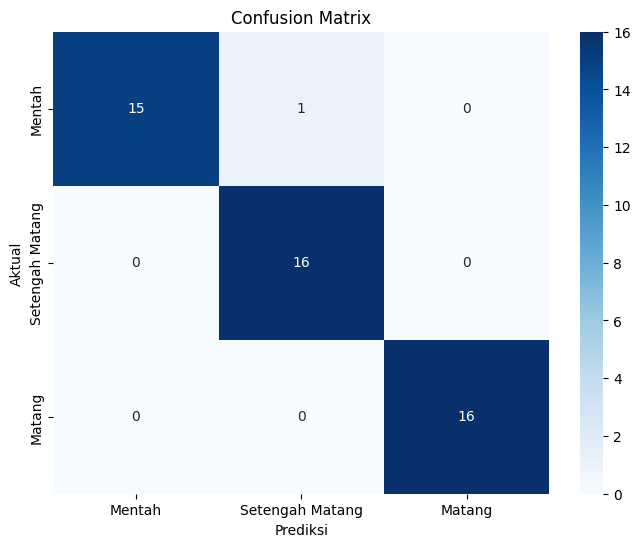

In [14]:
# Inisialisasi model KNN dengan k=7 dan menggunakan Euclidean distance
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# Melatih model
knn.fit(X_train, y_train)

# Memprediksi data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model KNN:', accuracy)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix secara keseluruhan
print('Confusion Matrix Keseluruhan:')
print(cm)

# Membuat confusion matrix per kelas untuk Tabel 4.9 hingga 4.11
classes = ['Mentah', 'Setengah Matang', 'Matang']
for i, cls in enumerate([1, 2, 3]):
    # True Positive (TP): diagonal value untuk kelas tersebut
    tp = cm[i, i]
    # False Negative (FN): jumlah baris kelas tersebut dikurangi TP
    fn = cm[i].sum() - tp
    # False Positive (FP): jumlah kolom kelas tersebut dikurangi TP
    fp = cm[:, i].sum() - tp
    # True Negative (TN): total semua elemen dikurangi (TP + FN + FP)
    tn = cm.sum() - (tp + fn + fp)

    # Membuat DataFrame untuk confusion matrix per kelas
    cm_df = pd.DataFrame({
        '': [classes[i], f'Bukan {classes[i]}', 'Total'],
        classes[i]: [tp, fp, tp + fp],
        f'Bukan {classes[i]}': [fn, tn, fn + tn],
        'Total': [tp + fn, fp + tn, cm.sum()]
    })

    # Menampilkan tabel
    print(f'Tabel 4.{9+i}: Confusion Matrix untuk {classes[i]} (Tabel 4.2.9)')
    print(cm_df)
    print()

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Langkah 9.5: Memeriksa Daftar File Gambar
Langkah ini memeriksa daftar file gambar di setiap kategori untuk memastikan path yang digunakan di Langkah 10 valid, sehingga mencegah error seperti 'file tidak ditemukan'.

In [15]:
# Memeriksa daftar file di setiap kategori
for category in categories:
    folder_path = f'/content/drive/MyDrive/apelfuji/{category}'
    files = os.listdir(folder_path)
    print(f'Daftar file di kategori {category}:')
    print(files[:5])  # Menampilkan 5 file pertama saja
    print()

Daftar file di kategori mentah:
['7.jpg', '27.jpg', '55.jpg', '71.jpg', '39.jpg']

Daftar file di kategori setengah_matang:
['19.jpg', '21.jpg', '33.jpg', '39.jpg', '72.jpg']

Daftar file di kategori matang:
['41.jpg', '36.jpg', '9.jpg', '12.jpg', '30.jpg']



## Langkah 10: Pengujian Blackbox dengan Gambar Baru (Tabel 4.12)
Langkah ini menguji model KNN dengan gambar baru yang belum pernah dilihat untuk memverifikasi kinerja model. Hasilnya digunakan untuk mengisi Tabel 4.12 (sesuai dengan Tabel 4.2.10 dalam laporan Anda). Pastikan path gambar sesuai dengan daftar file yang ditampilkan di Langkah 9.5.

In [16]:
# Daftar path gambar baru untuk pengujian
test_images = [
    '/content/drive/MyDrive/apelfuji/mentah/1.jpg',
    '/content/drive/MyDrive/apelfuji/setengah_matang/1.jpg',
    '/content/drive/MyDrive/apelfuji/matang/1.jpg'
]

# Label yang diharapkan untuk setiap gambar
expected_labels = [1, 2, 3]  # mentah: 1, setengah matang: 2, matang: 3

# Inisialisasi list untuk menyimpan hasil pengujian
results = []

# Mengiterasi setiap gambar uji
for img_path, expected_label in zip(test_images, expected_labels):
    # Membaca gambar
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Menghitung rata-rata RGB
    mean_r = np.mean(img_rgb[:, :, 0])
    mean_g = np.mean(img_rgb[:, :, 1])
    mean_b = np.mean(img_rgb[:, :, 2])

    # Menormalkan rata-rata RGB
    mean_r_norm = mean_r / 255.0
    mean_g_norm = mean_g / 255.0
    mean_b_norm = mean_b / 255.0

    # Mengonversi ke HSV
    h, s, v = rgb_to_hsv(mean_r, mean_g, mean_b)

    # Membuat fitur untuk prediksi
    features = np.array([[mean_r_norm, mean_g_norm, mean_b_norm, h, s, v]])

    # Memprediksi menggunakan model KNN
    predicted_label = knn.predict(features)[0]

    # Menentukan kesimpulan
    conclusion = 'Berhasil' if predicted_label == expected_label else 'Gagal'

    # Menyimpan hasil
    results.append([
        f'Uji gambar {categories[expected_label-1]} baru',
        expected_label,
        predicted_label,
        conclusion
    ])

# Membuat DataFrame untuk Tabel 4.12
df_4_12 = pd.DataFrame(results, columns=['Aktivitas', 'Hasil yang Diharapkan', 'Hasil yang Didapat', 'Kesimpulan'])

# Menampilkan Tabel 4.12
print('Tabel 4.12: Hasil Pengujian Blackbox (Tabel 4.2.10)')
print(df_4_12)

Tabel 4.12: Hasil Pengujian Blackbox (Tabel 4.2.10)
                         Aktivitas  Hasil yang Diharapkan  Hasil yang Didapat  \
0           Uji gambar mentah baru                      1                   1   
1  Uji gambar setengah_matang baru                      2                   2   
2           Uji gambar matang baru                      3                   3   

  Kesimpulan  
0   Berhasil  
1   Berhasil  
2   Berhasil  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
